<a href="https://colab.research.google.com/github/schatz06/EPL448_Project/blob/main/AllExceptTitleSynopsis_with_dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Packages ## 

In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
import pandas.plotting as pdplt

##Read Data##

In [41]:
train_data = pd.read_excel('Data_Train.xlsx') # read training data
test_data  = pd.read_excel('Data_Test.xlsx') # read test data

Check for corrupted or empty records

In [42]:
print("Shape of train data",train_data.shape,"Problematic records in training data: ",train_data.isnull().sum().sum())
print("Shape of test data",test_data.shape,"Problematic records in test data: ",test_data.isnull().sum().sum())

Shape of train data (6237, 9) Problematic records in training data:  0
Shape of test data (1560, 8) Problematic records in test data:  0


##Train Data Preprocessing##

Peek of the data

In [43]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


Statistical summary

In [44]:
print(train_data.describe())

              Price
count   6237.000000
mean     560.707516
std      690.110657
min       25.000000
25%      249.180000
50%      373.000000
75%      599.000000
max    14100.000000


Price box plot

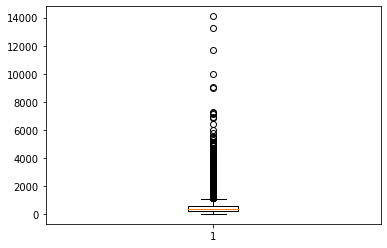

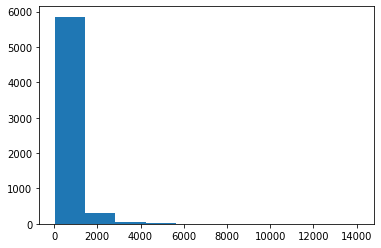

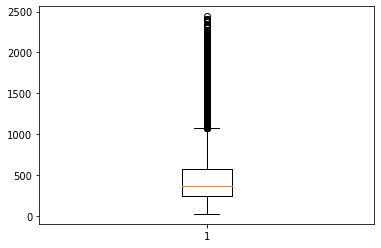

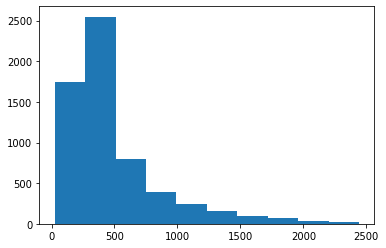

In [45]:
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()
median = np.percentile(train_data.Price,50)  # median
std = train_data.Price.std() # standard deviation 
train_data = train_data.drop(train_data[ train_data.Price > (median+3*std)].index) # drop "outliers " that are > median + 3*std
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()

In [46]:
train_data.describe()

,Price
count,6105.000000
mean,487.640822
std,384.816876
min,25.000000
25%,248.000000
50%,369.000000
75%,579.000000
max,2442.000000


Reviews Normalization

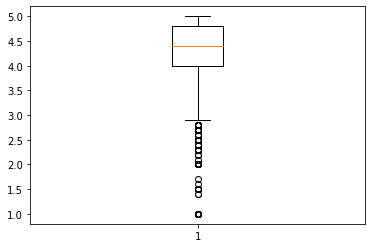

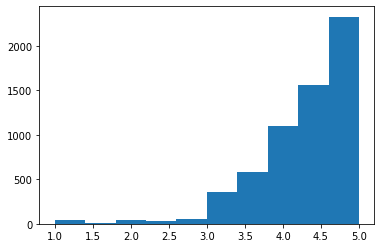

In [47]:
train_data['Reviews'] = train_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
plt.boxplot(train_data['Reviews'])
plt.show()
plt.hist(train_data['Reviews'])
plt.show()

Ratings Normalization

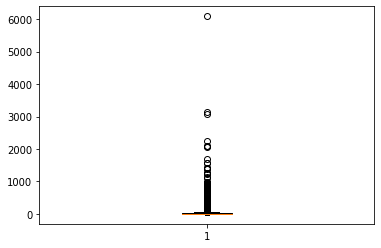

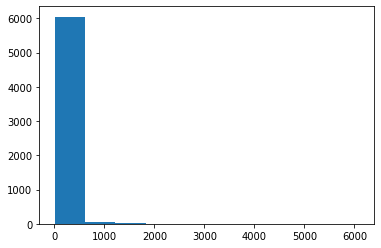

In [48]:
train_data['Ratings'] = train_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
plt.boxplot(train_data['Ratings'])
plt.show()
plt.hist(train_data['Ratings'])
plt.show()

Drop Title & Author & Synopsis & Genre columns

In [49]:
train_data.pop('Title')
train_data.pop('Synopsis')

0       THE HUNTERS return in their third brilliant no...
1       A layered portrait of a troubled genius for wh...
2       "During the time men live without a common Pow...
3       A handful of grain is found in the pocket of a...
4       For seven decades, "Life" has been thrilling t...
                              ...                        
6232    'F*cking brilliant' Sarah Knight\n'Very funny'...
6233    In this gripping page-turner, an ex-agent on t...
6234    'The most refreshing and radiant love story yo...
6235    Frostfire by Amanda Hocking is the stunning fi...
6236    Six years ago, Sam Capra watched his brother, ...
Name: Synopsis, Length: 6105, dtype: object

Edition Normalization / Drop edition

In [50]:
train_data['Edition_Year'] = train_data['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')
train_data['Edition'] = train_data['Edition'].apply(lambda x: x.split(',')[0])

In [51]:
train_data.head()

,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year
0,Chris Kuzneski,Paperback,4.0,8.0,Action & Adventure (Books),Action & Adventure,220.00,2016
1,Arun Khopkar,Paperback,3.9,14.0,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012
2,Thomas Hobbes,Paperback,4.8,6.0,International Relations,Humour,299.00,1982
3,Agatha Christie,Paperback,4.1,13.0,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017
4,Editors of Life,Hardcover,5.0,1.0,Photography Textbooks,"Arts, Film & Photography",965.62,2006


Book Category Normalization / Extract Categories

In [52]:
train_data= pd.get_dummies(train_data, columns= ['BookCategory'],drop_first=True)

Finish training inputs(z)

In [53]:
train_data.head()

,Author,Edition,Reviews,Ratings,Genre,Price,Edition_Year,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,Chris Kuzneski,Paperback,4.0,8.0,Action & Adventure (Books),220.00,2016,0,0,0,0,0,0,0,0,0,0
1,Arun Khopkar,Paperback,3.9,14.0,Cinema & Broadcast (Books),202.93,2012,0,1,0,0,0,0,0,0,0,0
2,Thomas Hobbes,Paperback,4.8,6.0,International Relations,299.00,1982,0,0,0,0,0,1,0,0,0,0
3,Agatha Christie,Paperback,4.1,13.0,Contemporary Fiction (Books),180.00,2017,0,0,0,0,1,0,0,0,0,0
4,Editors of Life,Hardcover,5.0,1.0,Photography Textbooks,965.62,2006,1,0,0,0,0,0,0,0,0,0


##Test Data Preprocessing##

Reviews Normalization

In [54]:
test_data['Reviews'] = test_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 

Ratings Normalization

In [55]:
test_data['Ratings'] = test_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 

Drop Title & Synopsis columns

In [56]:
test_data.pop('Title')
test_data.pop('Synopsis')

0       A collection of entire body of work of the She...
1       Enhance your software deployment workflow usin...
2       'Watch out, world. Here I come!'\nFor Victoria...
3       If you want to learn how to program, working w...
4       Learn and practise the verbs, prepositions and...
                              ...                        
1555    We design to elicit responses from people. We ...
1556    A 30-day course to write simple, sharp and att...
1557    The perennial bestseller-now available as a se...
1558    Heinz Guderian - master of the Blitzkrieg and ...
1559    Learn Spanish with the most convenient and eff...
Name: Synopsis, Length: 1560, dtype: object

Edition Normalization / Drop edition 

In [57]:
test_data['Edition_Year'] = test_data['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')
test_data['Edition'] = test_data['Edition'].apply(lambda x: x.split(',')[0])

In [58]:
test_data.head()

,Author,Edition,Reviews,Ratings,Genre,BookCategory,Edition_Year
0,Sir Arthur Conan Doyle,Mass Market Paperback,4.4,960.0,Short Stories (Books),"Crime, Thriller & Mystery",1986
1,Gabriel N. Schenker,Paperback,5.0,1.0,Operating Systems Textbooks,"Computing, Internet & Digital Media",2018
2,Danielle Steel,Paperback,5.0,4.0,Romance (Books),Romance,2011
3,Allen B. Downey,Paperback,4.1,11.0,Programming & Software Development (Books),"Computing, Internet & Digital Media",2016
4,Redman Gairns,Paperback,4.4,9.0,Linguistics (Books),"Language, Linguistics & Writing",2011


Book Category Normalization / Extract Categories

In [59]:
test_data= pd.get_dummies(test_data, columns= ['BookCategory'],drop_first=True)

Finish Test set Inputs

In [60]:
test_data.head()

,Author,Edition,Reviews,Ratings,Genre,Edition_Year,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,Sir Arthur Conan Doyle,Mass Market Paperback,4.4,960.0,Short Stories (Books),1986,0,0,0,0,1,0,0,0,0,0
1,Gabriel N. Schenker,Paperback,5.0,1.0,Operating Systems Textbooks,2018,0,0,0,1,0,0,0,0,0,0
2,Danielle Steel,Paperback,5.0,4.0,Romance (Books),2011,0,0,0,0,0,0,0,0,1,0
3,Allen B. Downey,Paperback,4.1,11.0,Programming & Software Development (Books),2016,0,0,0,1,0,0,0,0,0,0
4,Redman Gairns,Paperback,4.4,9.0,Linguistics (Books),2011,0,0,0,0,0,0,1,0,0,0


## Combine Train and Test datasets to extract categorical features ##

In [61]:
train = train_data.copy()
test = test_data.copy()
concat = pd.concat(objs=[train,test],axis=0)

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
concat = pd.get_dummies(concat, columns= ['Edition_Year'],drop_first=True)
concat['Author'] = le.fit_transform(concat['Author'])
concat = pd.get_dummies(concat, columns= ['Genre'],drop_first=True)
concat = pd.get_dummies(concat, columns= ['Edition'],drop_first=True)

In [64]:
concat.head()

,Author,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_Year_1925,Edition_Year_1942,Edition_Year_1960,Edition_Year_1961,Edition_Year_1964,Edition_Year_1969,Edition_Year_1970,Edition_Year_1971,Edition_Year_1972,Edition_Year_1973,Edition_Year_1974,Edition_Year_1975,Edition_Year_1976,Edition_Year_1977,Edition_Year_1978,Edition_Year_1979,Edition_Year_1980,Edition_Year_1981,Edition_Year_1982,Edition_Year_1983,Edition_Year_1984,Edition_Year_1985,Edition_Year_1986,Edition_Year_1987,Edition_Year_1988,Edition_Year_1989,...,Genre_Transportation & Automotive (Books),Genre_Travel & Holiday Guides (Books),Genre_Travel (Books),Genre_Travel Phrasebooks,Genre_Triathlon (Books),Genre_True Accounts (Books),Genre_United States History,Genre_Urban & Regional,Genre_Vascular Surgery,Genre_Visual Arts,Genre_Visual C++ Programming,Genre_Vocabulary Books,"Genre_Walking, Hiking & Trekking (Books)",Genre_Waste Management,Genre_Winter Sports (Books),"Genre_Words, Language & Grammar Reference",Genre_Workbooks,Genre_World African & Middle Eastern Literature,Genre_Writing Guides (Books),Genre_XHTML Software Programming,Genre_Young Adults' Money & Jobs (Books),Genre_Zoology,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,732,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,361,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3966,4.8,6.0,299.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,77,4.1,13.0,180.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1112,5.0,1.0,965.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [65]:
train_size = len(train)
train = concat[:train_size]
test = concat[train_size:]

In [66]:
train = train.astype({'Author':'int'})
test = test.astype({'Author':'int'})

In [67]:
train.head()

,Author,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_Year_1925,Edition_Year_1942,Edition_Year_1960,Edition_Year_1961,Edition_Year_1964,Edition_Year_1969,Edition_Year_1970,Edition_Year_1971,Edition_Year_1972,Edition_Year_1973,Edition_Year_1974,Edition_Year_1975,Edition_Year_1976,Edition_Year_1977,Edition_Year_1978,Edition_Year_1979,Edition_Year_1980,Edition_Year_1981,Edition_Year_1982,Edition_Year_1983,Edition_Year_1984,Edition_Year_1985,Edition_Year_1986,Edition_Year_1987,Edition_Year_1988,Edition_Year_1989,...,Genre_Transportation & Automotive (Books),Genre_Travel & Holiday Guides (Books),Genre_Travel (Books),Genre_Travel Phrasebooks,Genre_Triathlon (Books),Genre_True Accounts (Books),Genre_United States History,Genre_Urban & Regional,Genre_Vascular Surgery,Genre_Visual Arts,Genre_Visual C++ Programming,Genre_Vocabulary Books,"Genre_Walking, Hiking & Trekking (Books)",Genre_Waste Management,Genre_Winter Sports (Books),"Genre_Words, Language & Grammar Reference",Genre_Workbooks,Genre_World African & Middle Eastern Literature,Genre_Writing Guides (Books),Genre_XHTML Software Programming,Genre_Young Adults' Money & Jobs (Books),Genre_Zoology,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,732,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,361,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3966,4.8,6.0,299.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,77,4.1,13.0,180.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1112,5.0,1.0,965.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [68]:
y = train.pop('Price')
train.head()

,Author,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_Year_1925,Edition_Year_1942,Edition_Year_1960,Edition_Year_1961,Edition_Year_1964,Edition_Year_1969,Edition_Year_1970,Edition_Year_1971,Edition_Year_1972,Edition_Year_1973,Edition_Year_1974,Edition_Year_1975,Edition_Year_1976,Edition_Year_1977,Edition_Year_1978,Edition_Year_1979,Edition_Year_1980,Edition_Year_1981,Edition_Year_1982,Edition_Year_1983,Edition_Year_1984,Edition_Year_1985,Edition_Year_1986,Edition_Year_1987,Edition_Year_1988,Edition_Year_1989,Edition_Year_1990,...,Genre_Transportation & Automotive (Books),Genre_Travel & Holiday Guides (Books),Genre_Travel (Books),Genre_Travel Phrasebooks,Genre_Triathlon (Books),Genre_True Accounts (Books),Genre_United States History,Genre_Urban & Regional,Genre_Vascular Surgery,Genre_Visual Arts,Genre_Visual C++ Programming,Genre_Vocabulary Books,"Genre_Walking, Hiking & Trekking (Books)",Genre_Waste Management,Genre_Winter Sports (Books),"Genre_Words, Language & Grammar Reference",Genre_Workbooks,Genre_World African & Middle Eastern Literature,Genre_Writing Guides (Books),Genre_XHTML Software Programming,Genre_Young Adults' Money & Jobs (Books),Genre_Zoology,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,732,4.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,361,3.9,14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3966,4.8,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,77,4.1,13.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1112,5.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [69]:
test.pop('Price')
test.head()

,Author,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_Year_1925,Edition_Year_1942,Edition_Year_1960,Edition_Year_1961,Edition_Year_1964,Edition_Year_1969,Edition_Year_1970,Edition_Year_1971,Edition_Year_1972,Edition_Year_1973,Edition_Year_1974,Edition_Year_1975,Edition_Year_1976,Edition_Year_1977,Edition_Year_1978,Edition_Year_1979,Edition_Year_1980,Edition_Year_1981,Edition_Year_1982,Edition_Year_1983,Edition_Year_1984,Edition_Year_1985,Edition_Year_1986,Edition_Year_1987,Edition_Year_1988,Edition_Year_1989,Edition_Year_1990,...,Genre_Transportation & Automotive (Books),Genre_Travel & Holiday Guides (Books),Genre_Travel (Books),Genre_Travel Phrasebooks,Genre_Triathlon (Books),Genre_True Accounts (Books),Genre_United States History,Genre_Urban & Regional,Genre_Vascular Surgery,Genre_Visual Arts,Genre_Visual C++ Programming,Genre_Vocabulary Books,"Genre_Walking, Hiking & Trekking (Books)",Genre_Waste Management,Genre_Winter Sports (Books),"Genre_Words, Language & Grammar Reference",Genre_Workbooks,Genre_World African & Middle Eastern Literature,Genre_Writing Guides (Books),Genre_XHTML Software Programming,Genre_Young Adults' Money & Jobs (Books),Genre_Zoology,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,3692,4.4,960.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1272,5.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,867,5.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,161,4.1,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3192,4.4,9.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


##Prediction Methods##

Split train and test data


In [70]:
#y = train_data.pop('Price').to_numpy()
#X = train_data.to_numpy()
X = train.to_numpy()

Import packages

In [71]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

Decision Tree Regressor

In [72]:
parameters = {'splitter': ['best','random'],
              'min_samples_leaf': [1,2],
              }

In [73]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_DT = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_DT.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_DT.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_DT.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_DT.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.2s finished


 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

 The best score across ALL searched params:
 -0.019825889931161033

 The best parameters across ALL searched params:
 {'min_samples_leaf': 2, 'splitter': 'random'}


In [74]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = DecisionTreeRegressor(**grid_DT.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df_dt = pd.DataFrame(predictions.astype(int))
df_dt.columns=['Price']
filepath_dt = 'Predictions_DecisionTrees.xlsx'
df_dt.to_excel(filepath_dt, index=False)
df_dt.head()

,Price
0,392
1,789
2,665
3,742
4,474


Gradient Boosting Regressor


*   Used for the final results



GridSearchCV

In [75]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000,1500],
              'max_depth'    : [4,6,8,10]
              }

In [76]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_GBR = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_GBR.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 27

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.3228324429582189

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.9}


In [77]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = GradientBoostingRegressor(**grid_GBR.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df2 = pd.DataFrame(predictions.astype(int))
df2.columns=['Price']
df2['Price']= df2['Price']
filepath2 = 'PredictionsGradientBoosting.xlsx'
df2.to_excel(filepath2, index=False)
df2.head()

,Price
0,276
1,1174
2,436
3,940
4,355


Random Forest regressor


*   Used for the final results




In [78]:
parameters = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,110,120, 200]
}

In [79]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_RF = GridSearchCV(estimator=RandomForestRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_RF.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RF.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RF.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RF.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.040320851671889923

 The best parameters across ALL searched params:
 {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 120}


In [80]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = RandomForestRegressor(**grid_RF.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df3 = pd.DataFrame(predictions.astype(int))
df3.columns=['Price']
filepath3 = 'Predictions_RandomForest.xlsx'
df3.to_excel(filepath3, index=False)
df3.head()

,Price
0,476
1,512
2,480
3,507
4,476


KNeighbors Regressor



In [81]:
parameters = {
    'n_neighbors': [4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [82]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_KNN = GridSearchCV(estimator=KNeighborsRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_KNN.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_KNN.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_KNN.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_KNN.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.4min finished


 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                    weights='distance')

 The best score across ALL searched params:
 0.19940269072147215

 The best parameters across ALL searched params:
 {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [83]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = KNeighborsRegressor(**grid_KNN.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df4 = pd.DataFrame(predictions.astype(int))
df4.columns=['Price']
filepath4 = 'Predictions_KNeighbors.xlsx'
df4.to_excel(filepath4, index=False)
df4.head()

,Price
0,362
1,974
2,357
3,641
4,452


Elastic Net




In [84]:
parameters = {
    'alpha': [0,0.5,1],
    'l1_ratio': [0,0.5,1],
    'selection': ['cyclic', 'random']
}

In [85]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_EN = GridSearchCV(estimator=ElasticNet(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_EN.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_EN.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_EN.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_EN.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.9min finished


 Results from Grid Search 

 The best estimator across ALL searched params:
 ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='random', tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 0.2563425601893595

 The best parameters across ALL searched params:
 {'alpha': 0.5, 'l1_ratio': 0.5, 'selection': 'random'}


In [86]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = ElasticNet(**grid_EN.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df5 = pd.DataFrame(predictions.astype(int))
df5.columns=['Price']
filepath5 = 'Predictions_ElasticNet.xlsx'
df5.to_excel(filepath5, index=False)
df5.head()

,Price
0,195
1,898
2,380
3,707
4,451


Lasso



In [87]:
parameters = {
    'alpha': [0,0.5,1],
    'selection': ['cyclic', 'random']
}

In [88]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_LASSO = GridSearchCV(estimator=Lasso(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_LASSO.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_LASSO.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_LASSO.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_LASSO.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.8s finished


 Results from Grid Search 

 The best estimator across ALL searched params:
 Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='random',
      tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 0.24952806712210843

 The best parameters across ALL searched params:
 {'alpha': 1, 'selection': 'random'}


In [89]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = Lasso(**grid_LASSO.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df6 = pd.DataFrame(predictions.astype(int))
df6.columns=['Price']
filepath6 = 'Predictions_Lasso.xlsx'
df6.to_excel(filepath6, index=False)
df6.head()

,Price
0,208
1,964
2,376
3,726
4,445


SVR


In [90]:
parameters = {
    'C': [1,2,5,10],
    'epsilon': [0.1,0.2,0.3],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_SVR = GridSearchCV(estimator=SVR(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_SVR.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_SVR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_SVR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_SVR.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 25

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

 The best score across ALL searched params:
 0.18218397568145944

 The best parameters across ALL searched params:
 {'C': 10, 'epsilon': 0.3, 'kernel': 'linear'}


In [91]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = SVR(**grid_SVR.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df7 = pd.DataFrame(predictions.astype(int))
df7.columns=['Price']
filepath7 = 'Predictions_SVR.xlsx'
df7.to_excel(filepath7, index=False)
df7.head()

,Price
0,164
1,1091
2,309
3,620
4,402
